In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import random

In [2]:
filename = "tasks"
file = open(filename,"r")
lines = file.readlines()
n = int(lines[0])
if n < 1:
    print("Invalid number of tasks")

In [3]:
tasks = [[] for _ in range(n)]
u = 0
lcm = 1
for i in range(1,len(lines)):
    if tasks[-1] != [] :
        print("More than "+str(n)+" tasks")
        exit()
    tasks[i-1] = [i]
    tasks[i-1] +=[int(el) for el in lines[i].split(',') ]

    u += float(tasks[i-1][1]/tasks[i-1][2])
    lcm = np.lcm(lcm,tasks[i-1][2])
if tasks[-1] == []:
    print("Less than "+str(n)+" tasks")
print(tasks)

[[1, 1, 3, 3, 0], [2, 1, 5, 5, 0], [3, 2, 6, 6, 0]]


In [4]:

print('Utilization: ',u)
if u > 1:
    print("Not schedulable by EDF")

print("LCM: ",lcm)



Utilization:  0.8666666666666667
LCM:  30


In [5]:
current = [[]for _ in range(n)]
for i in range(n):
    current[i] = [i+1]
    # Current keeps track of tasks to be executed
    # Current[i][0] = index, Current[i][1] = arrival time, Current[i][2] = time remaining, Current[i][3] = Deadline, Current[i][4] = Next arrival
    current[i] += [tasks[i][4],tasks[i][1],tasks[i][4]+tasks[i][3]]

time = 0
gantt = []
while time < lcm:
    sched = None
    dead = None
    for task in current:
        if task[1] <= time:
            if sched == None:
                sched = task[0]
                dead = task[3]
            elif task[3] < dead:
                sched = task[0]
                dead = task[3]
    if sched == None:
        gantt.append([time,"Idle"])
    else:
        gantt.append([time,"Task "+str(sched)])
        current[sched-1][2]-=1
        if current[sched-1][2] == 0:
            current[sched-1][1] += tasks[sched-1][2]
            current[sched-1][2] = tasks[sched-1][1]
            current[sched-1][3] = current[sched-1][1] + tasks[sched-1][3]
    time +=1


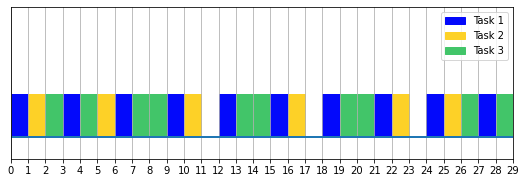

In [10]:
# Colors for plotting
seen = set()
colors = {}
for i in range(n):
    color = (random.random(),random.random(),random.random())
    while color in seen:
        color = (random.random(),random.random(),random.random())
    seen.add(color)
    colors["Task "+str(i+1)] = color

plt.rcParams['figure.figsize'] = [(0.3)*lcm,2.8]
fig, ax = plt.subplots()
plt.axhline(y=0.5,linewidth=2)
for entry in gantt:
    if entry[1] != "Idle": 
        ax.add_patch(Rectangle((entry[0],0.5),1,0.1,color = colors[entry[1]]))
plt.xticks(ticks = range(lcm),labels = range(lcm))
plt.yticks([])
plt.grid(axis='x',alpha=1)

legend = []
for i in range(n):
    task = 'Task '+str(i+1)
    entry = mpatches.Patch(color = colors[task],label= task)
    legend.append(entry)
ax.set_ylim([0.45,0.8])
plt.legend(handles = legend)
plt.show()